# Game of Life

In [46]:
using ASCIIPlots;
using Interact;
using PyPlot;

INFO: Precompiling module PyPlot...


In [1]:
function TimeEvaluate(生活,tn::Int64,N::Int64)
    neighx=Array{UInt64}(N^2,8);
    neighy=Array{UInt64}(N^2,8);
    armod(x,y)=mod(x-1,y)+1
    nnei=8;

    for ii in 1:N
        neighx[ii,1]=armod(ii-1+N,N);
        neighx[ii,2]=armod(ii+1,N);
        
        neighx[ii,3]=armod(ii-1+N,N);
        neighx[ii,4]=ii;
        neighx[ii,5]=armod(ii+1,N);
        neighx[ii,6]=armod(ii-1+N,N);
        neighx[ii,7]=ii;
        neighx[ii,8]=armod(ii+1,N);
            
        neighy[ii,1:2]=ii;
        neighy[ii,3:5]=armod(ii-1+N,N);
        neighy[ii,6:8]=armod(ii+1,N);
    end
    
    
    生活v=zeros(UInt64,N,N,tn);
    生活v[:,:,1]=生活[:,:]

   for ti in 2:tn
        生活v[:,:,ti]=生活v[:,:,ti-1];
        for ii in 1:N
            for jj in 1:N
                友達=0;
                for kk in 1:nnei
                    友達+=生活v[neighx[ii,kk],neighy[jj,kk],ti-1];
                end
                if 生活v[ii,jj,ti-1]==0 && 友達==3
                    生活v[ii,jj,ti]=1
                    #println("Spawn ",友達)
                else
                    if 友達<2 || 友達>3
                        生活v[ii,jj,ti]=0
                        #println("Kill ",友達)
                    end
                end
            end
        end
    end 
    
    return  生活v;
end

TimeEvaluate (generic function with 1 method)

In [39]:
#A blinker
blinker=zeros(UInt64,3,3);
blinker[:,2]=1;

#A Toad
toad=zeros(UInt64,4,4);
toad[1:3,2]=1;
toad[2:4,3]=1;

#A Beacon
beacon=zeros(UInt64,4,4)
beacon[1:2,1:2]=1;
beacon[3:4,3:4]=1;

#A Glider
glider=zeros(UInt64,3,3);
glider[1:3,1]=1;
glider[3,2]=1;
glider[2,3]=1;

#Gun
gun=zeros(UInt64,9,37);
gun[4:5,1:2]=1

gun[3:5,11]=1
gun[2,12]=1
gun[1,13:14]=1
gun[6,12]=1
gun[7,13:14]=1
gun[4,15]=1
gun[6,16]=1
gun[2,16]=1
gun[3:5,17]=1
gun[4,18]=1

gun[5:7,21:22]=1
gun[8,23]=1
gun[4,23]=1
gun[8:9,25]=1
gun[3:4,25]=1

gun[6:7,35:36]=1

1

In [44]:
imagesc(gun[:,15:37])



	                                              
	  @#                                          
	    @#              @#                        
	@#  @#@#        @#  @#                        
	    @#      @#@#                              
	  @#        @#@#                        @#@#  
	            @#@#                        @#@#  
	                @#  @#                        
	                    @#                        



In [88]:
run=zeros(UInt64,100,100);

#run[6:8,6:8]=glider
#run[12:14,12:14]=transpose(glider)
#run[20:22,20:22]=glider[3:-1:1,:]
#run[15:17,3:5]=glider[:,3:-1:1]
run[1:9,41:77]=gun;
tn=1000;

lifeout=TimeEvaluate(run,tn,100);

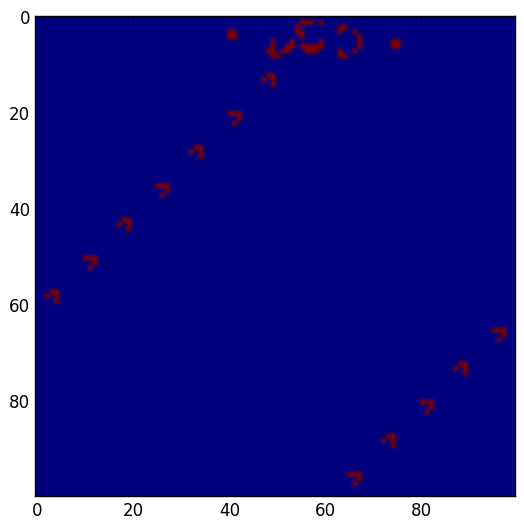

PyObject <matplotlib.image.AxesImage object at 0x327e1f7d0>

In [89]:
imshow(lifeout[:,:,400])

Interact.Slider{Int64}([Reactive.Input{Int64}] 500,"ii",500,1:1000)

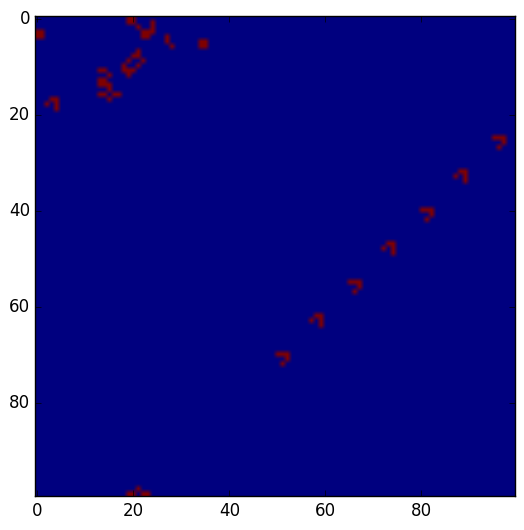

PyObject <matplotlib.image.AxesImage object at 0x3266cc9d0>

In [69]:
@manipulate for ii in 1:tn
    
    #imagesc(lifeout[:,:,ii])
    imshow(lifeout[:,:,ii])
end

In [ ]:
neighx=Array{UInt64}(N^2,8);
neighy=Array{UInt64}(N^2,8);
armod(x,y)=mod(x-1,y)+1
nnei=8;

for ii in 1:N
    neighx[ii,1]=armod(ii-1+N,N);
    neighx[ii,2]=armod(ii+1,N);
        
    neighx[ii,3]=armod(ii-1+N,N);
    neighx[ii,4]=ii;
    neighx[ii,5]=armod(ii+1,N);
    neighx[ii,6]=armod(ii-1+N,N);
    neighx[ii,7]=ii;
    neighx[ii,8]=armod(ii+1,N);
end

for jj in 1:N
    neighy[jj,1:2]=jj;
    neighy[jj,3:5]=armod(jj-1+N,N);
    neighy[jj,6:8]=armod(jj+1,N);
end

In [ ]:
N=30;
生活=zeros(UInt64,N,N);
rand!(生活,0:1)
#生活
imagesc(生活)

tn=100;
生活v=zeros(UInt64,N,N,tn);
生活v[:,:,1]=生活[:,:]

t=2;

for ti in 2:tn
    生活v[:,:,ti]=生活v[:,:,ti-1];
    for ii in 1:N
        for jj in 1:N
            友達=0;
            for kk in 1:nnei
                友達+=生活v[neighx[ii,kk],neighy[jj,kk],ti-1];
            end
            if 生活v[ii,jj,ti-1]==0 && 友達==3
                生活v[ii,jj,ti]=1
                #println("Spawn ",友達)
            else
                if 友達<2 || 友達>3
                    生活v[ii,jj,ti]=0
                    #println("Kill ",友達)
                end
            end
        end
    end
end

In [ ]:
#blinker
if false
    x0=5;
    y0=5;
    run2[(1:3)+x0-1,0+y0]=1;
end

#toad
if false
    x0=10;
    y0=10;
    run2[(1:3)+x0,y0]=1;
    run2[(2:4)+x0,1+y0]=1;
end

#beacon
if false
    x0=0;
    y0=20;
    run2[(1:2)+x0,(1:2)+y0]=1;
    run2[(3:4)+x0,(3:4)+y0]=1;
end

#A Pulsar
if false
    x0=10;
    y0=10;
    pulvx=[1,1,-1,-1];
    pulvy=[1,-1,1,-1];
    for p in 1:4
        run2[x0+pulvx[p]*(2:4),y0+pulvy[p]*1]=1;
        run2[x0+pulvx[p]*1,y0+pulvy[p]*(2:4)]=1;
        run2[x0+pulvx[p]*(2:4),y0+pulvy[p]*6]=1;
        run2[x0+pulvx[p]*6,y0+pulvy[p]*(2:4)]=1;
    end
end


for gln in 1:5
    x0=3*gln;
    y0=4*gln;
    run2[x0+(1:3),y0]=1;
    run2[x0+3,y0+1]=1;
    run2[x0+2,y0+2]=1;

end